In [3]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

if(len(os.sys.argv) > 1):
    if os.sys.argv[1] == 'gpu':
        physical_devices = tf.config.experimental.list_physical_devices('GPU')
        assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
        config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
    elif os.sys.argv[1] == 'cpu':
        os.environ['CUDA_VISIBLE_DEVICES']="" 
else:
    os.environ['CUDA_VISIBLE_DEVICES']=""

In [4]:
os.listdir('.')

['project3_COSC525.zip',
 '.ipynb_checkpoints',
 'project3.pdf',
 'task1.py',
 '__pycache__',
 'read_data.py',
 'task2.py',
 'reading.ipynb',
 'project3_COSC525']

In [5]:
train = []
val = []

for file in os.listdir('./project3_COSC525/val'):
    pix = np.array(Image.open('./project3_COSC525/val/' + file))
    val.append(pix)

for file in os.listdir('./project3_COSC525/train'):
    pix = np.array(Image.open('./project3_COSC525/train/' + file))
    train.append(pix)

train = np.asarray(train)
val = np.asarray(val)

print(len(train))
print(len(val))

86744
10954


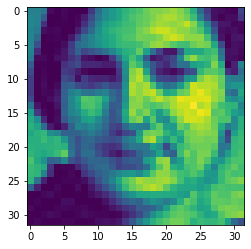

In [6]:
plt.imshow(train[0])

In [7]:
print(train.shape)
train_max = np.amax(train, axis=0)
train_min = np.amin(train, axis=0)

(86744, 32, 32)


In [8]:
#normalize
train_norm = (train - train_min) / (train_max - train_min)
train_norm.shape
val_norm = (val - train_min) / (train_max - train_min)

train_norm = train_norm.reshape(-1,32,32,1)



In [9]:
print(train_norm.shape)

(86744, 32, 32, 1)


In [16]:
train_labels = pd.read_csv('project3_COSC525/fairface_label_train.csv')
val_labels = pd.read_csv('project3_COSC525/fairface_label_val.csv')

In [20]:
age_classes = train_labels.age.unique()
gender_classes = train_labels.gender.unique()
race_classes = train_labels.race.unique()

In [21]:
race_classes.shape

(7,)

In [26]:
codes,_ = train_labels.race.factorize()


In [46]:
codes
labels = np.zeros((len(codes), race_classes.size))
for i, c in enumerate(codes):
    labels[i,c] = 1
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
from task1 import build_network

In [30]:
from read_data import read_data

In [31]:
dataset = read_data()

In [33]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [39]:
dataset['race_t_labels'][:][0]

array([0, 1, 2, ..., 1, 2, 3])

In [41]:
sgd = optimizers.SGD(lr=0.5)
loss = tf.keras.losses.CategoricalCrossentropy()

# create race class
model = build_network(7)
model.compile(loss=loss, optimizer=sgd, metrics=['accuracy'])
history=model.fit(dataset['train_norm'],dataset['race_t_labels'][:][0],batch_size=32,epochs=10, verbose=True)

Epoch 1/10


ValueError: in user code:

    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /usr/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /usr/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /usr/lib/python3.9/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 8) are incompatible
